## **Loading and Cleaning Dataset**

In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# Load the dataset
data = pd.read_csv('data.csv')
data.count()
data.head()

,Start Time,End Time,Vessel Name,Power Galley 1 (MW),Power Galley 2 (MW),Power Service (MW),HVAC Chiller 1 Power (MW),HVAC Chiller 2 Power (MW),HVAC Chiller 3 Power (MW),Scrubber Power (MW),...,Starboard Side Propulsion Power (MW),Bow Thruster 1 Power (MW),Bow Thruster 2 Power (MW),Bow Thruster 3 Power (MW),Stern Thruster 1 Power (MW),Stern Thruster 2 Power (MW),Main Engine 1 Fuel Flow Rate (kg/h),Main Engine 2 Fuel Flow Rate (kg/h),Main Engine 3 Fuel Flow Rate (kg/h),Main Engine 4 Fuel Flow Rate (kg/h)
0,2023-01-01T00:00:00,2023-01-01T00:05:00,Vessel 1,0.0946,0.1384,5.4654,0.5074,0.0,0.4979,0.4191,...,0.9837,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1645.82000
1,2023-01-01T00:05:00,2023-01-01T00:10:00,Vessel 1,0.0540,0.1370,5.4387,0.5158,0.0,0.4982,0.4204,...,0.9885,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1643.78999
2,2023-01-01T00:10:00,2023-01-01T00:15:00,Vessel 1,0.0439,0.1785,5.5265,0.5117,0.0,0.5032,0.4199,...,0.9595,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1642.07000
3,2023-01-01T00:15:00,2023-01-01T00:20:00,Vessel 1,0.0733,0.1725,5.5257,0.5177,0.0,0.5103,0.4188,...,0.9914,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1650.71000
4,2023-01-01T00:20:00,2023-01-01T00:25:00,Vessel 1,0.0780,0.1397,5.4634,0.5169,0.0,0.5100,0.4203,...,0.9932,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1644.54000


In [23]:
# Display the first few rows and check for missing values
print(data.head())
print(data.isnull().sum())

# Drop rows with missing values
data.dropna(inplace=True)

# Convert date columns to datetime
data['Start Time'] = pd.to_datetime(data['Start Time'])
data['End Time'] = pd.to_datetime(data['End Time'])

            Start Time             End Time Vessel Name  Power Galley 1 (MW)  \
0  2023-01-01T00:00:00  2023-01-01T00:05:00    Vessel 1               0.0946   
1  2023-01-01T00:05:00  2023-01-01T00:10:00    Vessel 1               0.0540   
2  2023-01-01T00:10:00  2023-01-01T00:15:00    Vessel 1               0.0439   
3  2023-01-01T00:15:00  2023-01-01T00:20:00    Vessel 1               0.0733   
4  2023-01-01T00:20:00  2023-01-01T00:25:00    Vessel 1               0.0780   

   Power Galley 2 (MW)  Power Service (MW)  HVAC Chiller 1 Power (MW)  \
0               0.1384              5.4654                     0.5074   
1               0.1370              5.4387                     0.5158   
2               0.1785              5.5265                     0.5117   
3               0.1725              5.5257                     0.5177   
4               0.1397              5.4634                     0.5169   

   HVAC Chiller 2 Power (MW)  HVAC Chiller 3 Power (MW)  Scrubber Power (MW)  \


## **Power Consumption KPI's**

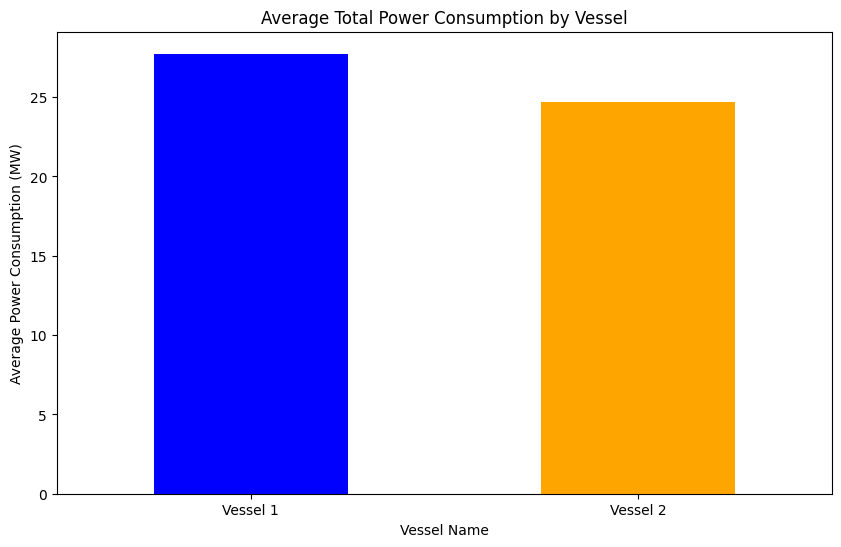

In [24]:
# Define all power consumption columns, including the new ones
all_power_columns = [
    'Power Galley 1 (MW)',
    'Power Galley 2 (MW)',
    'Power Service (MW)',
    'HVAC Chiller 1 Power (MW)',
    'HVAC Chiller 2 Power (MW)',
    'HVAC Chiller 3 Power (MW)',
    'Scrubber Power (MW)',
    'Diesel Generator 1 Power (MW)',
    'Diesel Generator 2 Power (MW)',
    'Diesel Generator 3 Power (MW)',
    'Diesel Generator 4 Power (MW)',
    'Propulsion Power (MW)',
    'Port Side Propulsion Power (MW)',
    'Starboard Side Propulsion Power (MW)',
    'Bow Thruster 1 Power (MW)',
    'Bow Thruster 2 Power (MW)',
    'Bow Thruster 3 Power (MW)',
    'Stern Thruster 1 Power (MW)',
    'Stern Thruster 2 Power (MW)'
]

# Calculate total power consumption for each vessel including all components
data['Total Power (MW)'] = data[all_power_columns].sum(axis=1)

# Compare average total power consumption by vessel
power_comparison = data.groupby('Vessel Name')['Total Power (MW)'].mean()

# Plot the comparison
plt.figure(figsize=(10, 6))
power_comparison.plot(kind='bar', color=['blue', 'orange'])
plt.title('Average Total Power Consumption by Vessel')
plt.xlabel('Vessel Name')
plt.ylabel('Average Power Consumption (MW)')
plt.xticks(rotation=0)
plt.show()

In [25]:
# Aggregate power consumption by type
power_consumption_summary = data[all_power_columns].sum()

# Convert to a DataFrame for easier visualization
power_consumption_df = power_consumption_summary.reset_index()
power_consumption_df.columns = ['Power Type', 'Total Consumption (MW)']

# Sort the DataFrame for better visualization
power_consumption_df = power_consumption_df.sort_values(by='Total Consumption (MW)', ascending=False)

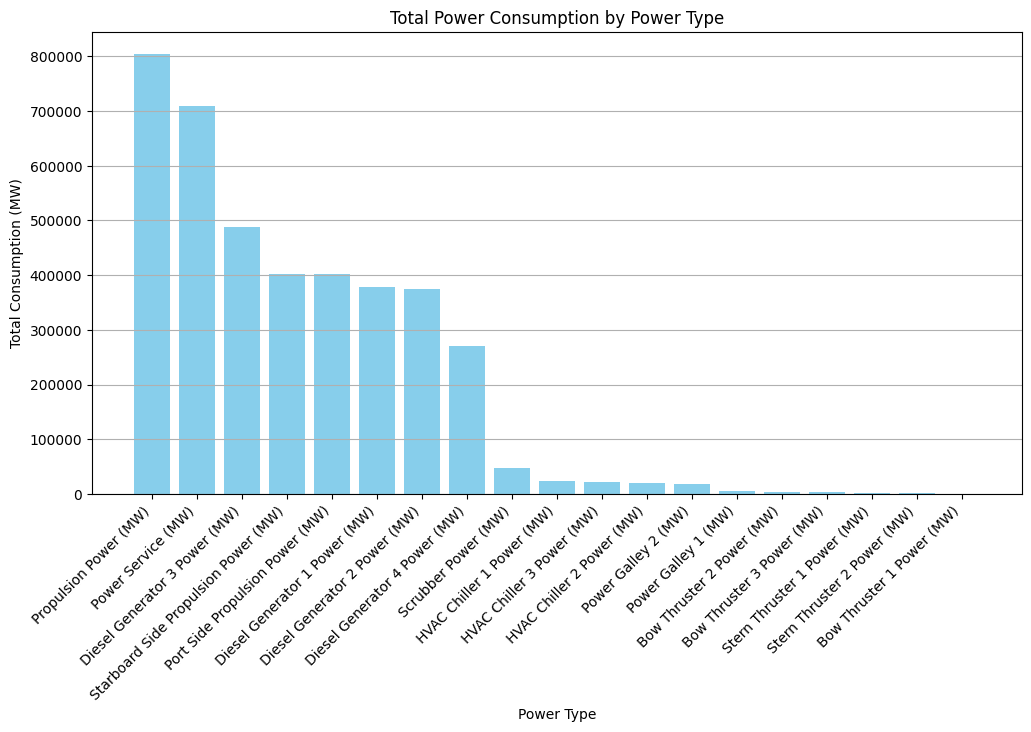

In [26]:
# Plot the power consumption by type
plt.figure(figsize=(12, 6))
plt.bar(power_consumption_df['Power Type'], power_consumption_df['Total Consumption (MW)'], color='skyblue')
plt.title('Total Power Consumption by Power Type')
plt.xlabel('Power Type')
plt.ylabel('Total Consumption (MW)')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y')
plt.show()

In [27]:
# Group by Vessel Name and sum the power consumption for each type
vessel_power_consumption = data.groupby('Vessel Name')[all_power_columns].sum()

# Convert to a DataFrame for easier visualization
vessel_power_consumption_df = vessel_power_consumption.reset_index()
vessel_power_consumption_df

,Vessel Name,Power Galley 1 (MW),Power Galley 2 (MW),Power Service (MW),HVAC Chiller 1 Power (MW),HVAC Chiller 2 Power (MW),HVAC Chiller 3 Power (MW),Scrubber Power (MW),Diesel Generator 1 Power (MW),Diesel Generator 2 Power (MW),Diesel Generator 3 Power (MW),Diesel Generator 4 Power (MW),Propulsion Power (MW),Port Side Propulsion Power (MW),Starboard Side Propulsion Power (MW),Bow Thruster 1 Power (MW),Bow Thruster 2 Power (MW),Bow Thruster 3 Power (MW),Stern Thruster 1 Power (MW),Stern Thruster 2 Power (MW)
0,Vessel 1,3331.85330,9466.26490,361798.91130,8107.22620,7114.23540,9151.6453,31450.64090,217479.20880,173013.6142,280060.83050,139170.54360,447926.06200,222516.81660,225409.25020,0.0,1790.6391,1424.6072,984.4622,841.4830
1,Vessel 2,2680.60934,9309.14767,346956.77243,15218.54059,13401.25567,12322.6056,15520.28053,161699.57926,202053.9784,208202.85303,131330.53064,356329.84254,179092.02646,177237.85517,0.0,2116.5236,1399.3999,547.7996,424.2861


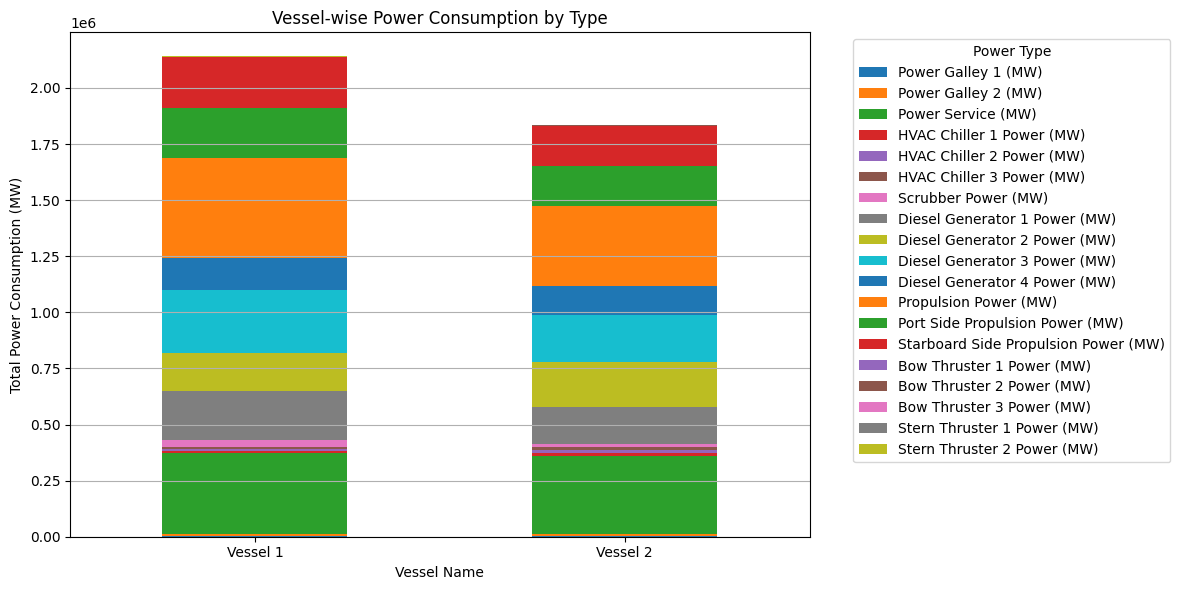

In [28]:
# Plot the vessel-wise power consumption by type
vessel_power_consumption_df.set_index('Vessel Name')[all_power_columns].plot(kind='bar', stacked=True, figsize=(12, 6))

plt.title('Vessel-wise Power Consumption by Type')
plt.xlabel('Vessel Name')
plt.ylabel('Total Power Consumption (MW)')
plt.legend(title='Power Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.tight_layout()  # Adjust layout to make room for legend
plt.show()

In [29]:
# Set Start Time as the index
data.set_index('Start Time', inplace=True)

# Resample data to hourly averages for power consumption
hourly_power_consumption = data[all_power_columns].resample('H').mean()

# Reset index for easier plotting
hourly_power_consumption.reset_index(inplace=True)

<ipython-input-29-c24a2fd99a88>:5: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  hourly_power_consumption = data[all_power_columns].resample('H').mean()


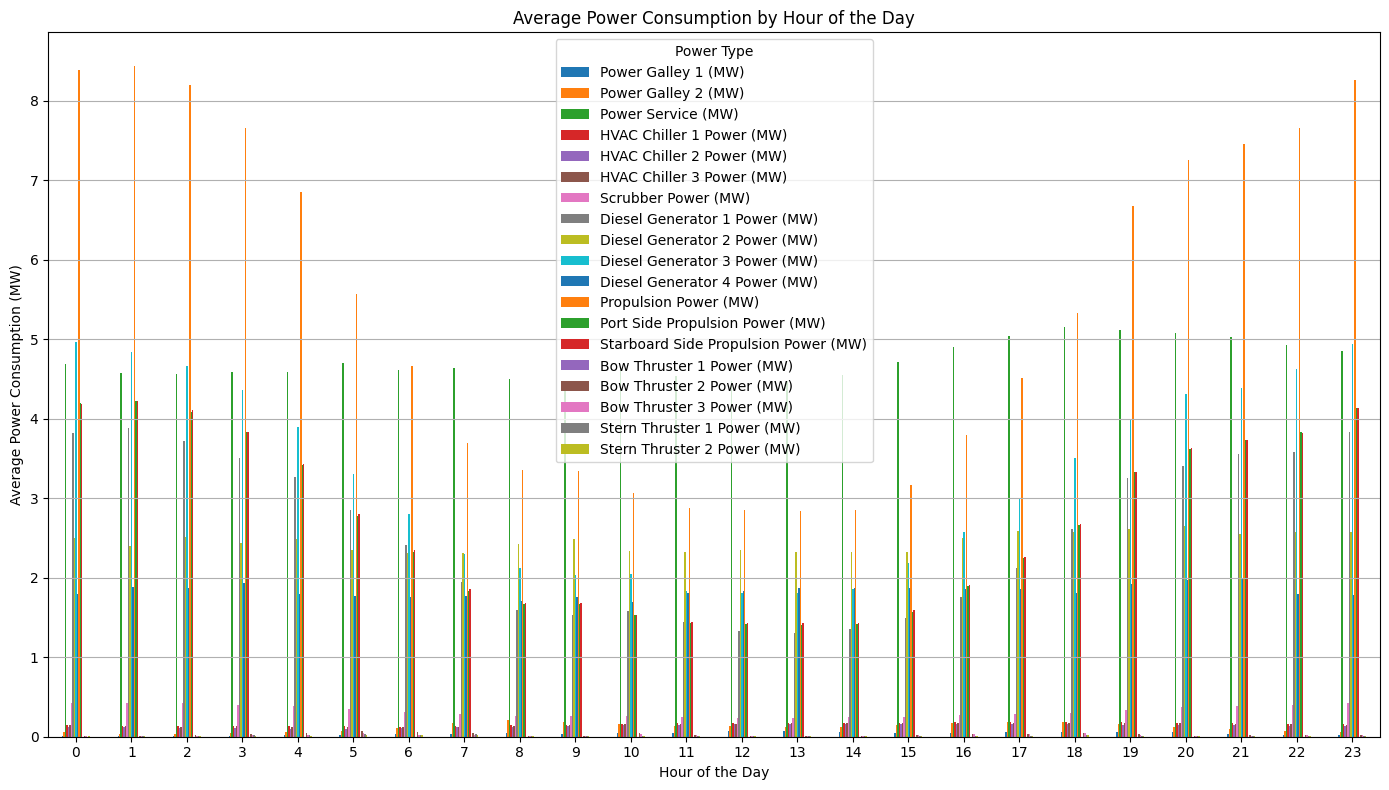

In [30]:
# Extract hour from the time index
hourly_power_consumption['Hour'] = hourly_power_consumption['Start Time'].dt.hour

# Calculate the average power consumption for each hour of the day
average_hourly_power = hourly_power_consumption.groupby('Hour')[all_power_columns].mean()

# Plot bar plot of average power consumption by hour
average_hourly_power.plot(kind='bar', figsize=(14, 8))

plt.title('Average Power Consumption by Hour of the Day')
plt.xlabel('Hour of the Day')
plt.ylabel('Average Power Consumption (MW)')
plt.xticks(rotation=0)
plt.legend(title='Power Type')
plt.grid(axis='y')
plt.tight_layout()
plt.show()

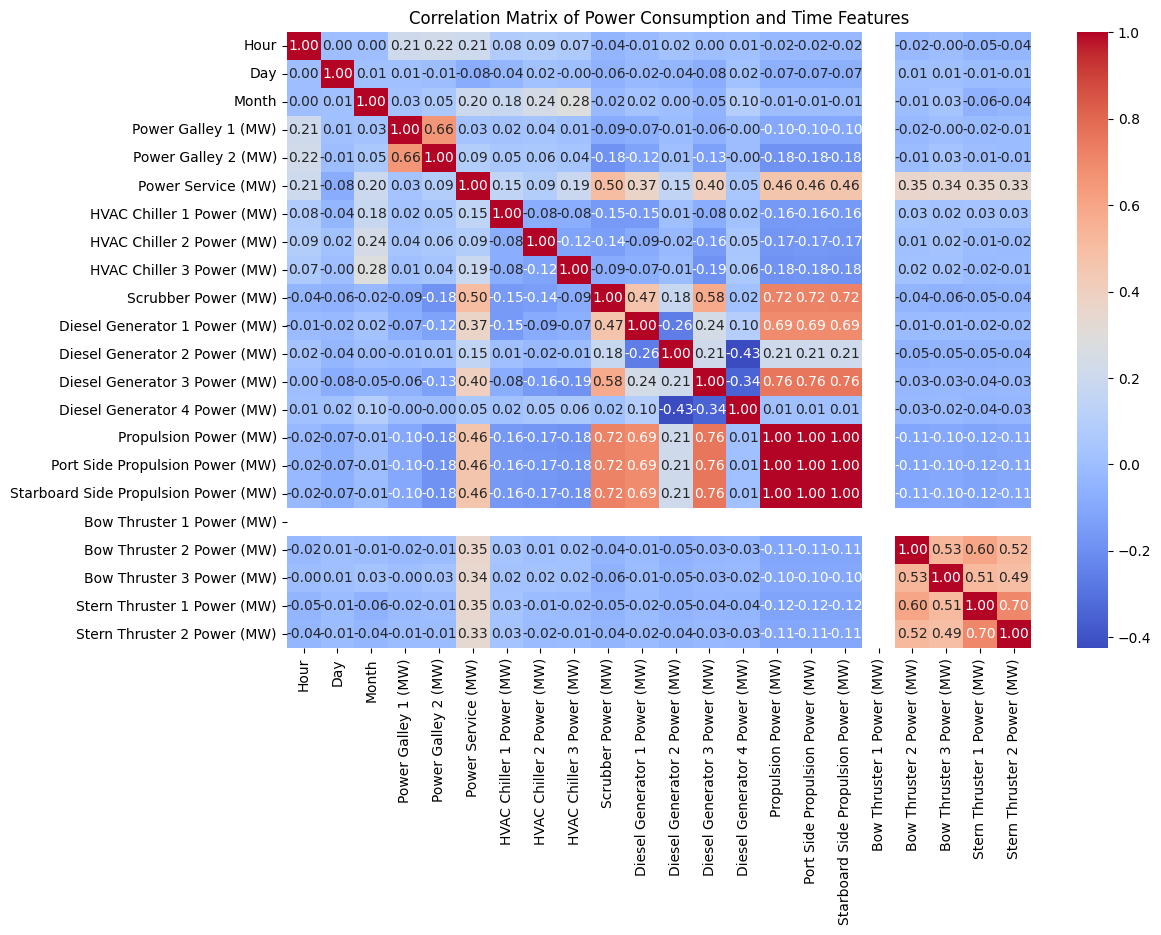

In [31]:
import seaborn as sns
# Create a new DataFrame with the time features
time_features = pd.DataFrame()
time_features['Hour'] = hourly_power_consumption['Start Time'].dt.hour
time_features['Day'] = hourly_power_consumption['Start Time'].dt.dayofweek
time_features['Month'] = hourly_power_consumption['Start Time'].dt.month

# Combine power consumption data with time features
correlation_df = pd.concat([time_features, hourly_power_consumption[all_power_columns]], axis=1)

# Calculate correlation matrix
correlation_matrix = correlation_df.corr()

# Plot heatmap of correlations
plt.figure(figsize=(12, 8))
plt.title('Correlation Matrix of Power Consumption and Time Features')
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm')
plt.show()

## **In Power Consumption KPI**,
We have calculated

1) Average total power consumption by vessel

Vessel 1 exhibited higher average total power consumption compared to Vessel 2. This suggests that Vessel 1 may be less efficient or has greater operational demands that lead to increased energy usage.

2) Power consumption by Power type

The total power consumption is primarily dominated by specific power types, with the propulsion power being the largest contributor for both vessels. This is expected as propulsion is essential for vessel movement.

3) Vessel-wise power consumption by type
Vessel 1 and Vessel 2 exhibit distinct power consumption profiles, with varying energy demands across different power types. This variation may reflect differences in design, operational practices, and occupancy levels.

4) Average Power Consumption by Hour of the Day
The analysis reveals distinct patterns of power consumption at different hours, indicating the vessel's operational schedule and the varying demands placed on its systems.

Key Observations:

Morning Peaks:
There is often a noticeable rise in power consumption during the morning hours (e.g., 6 AM - 9 AM). This is likely due to increased use of HVAC systems for guest comfort and energy demands from kitchens and dining areas.

Afternoon Dip:
A slight decrease in power consumption may be observed during the early afternoon (e.g., 1 PM - 3 PM), possibly reflecting a lull in activities as guests engage in excursions or leisure activities.

Evening Surge:
Power consumption tends to spike again in the evening (e.g., 6 PM - 9 PM), likely correlating with dinner service and increased use of lighting and entertainment systems as guests return onboard.

Late Night Higher Consumption:
The highest levels of power consumption are typically seen late at night (e.g., after 10 PM).

# **Fuel Efficiency KPI's**

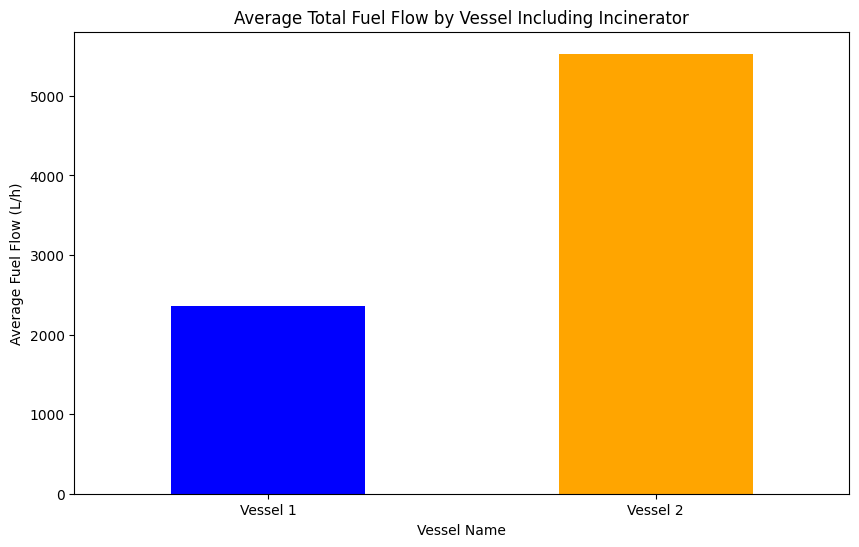

In [32]:
data_2 = pd.read_csv('data.csv')
data_2.count()
# Display the first few rows and check for missing values
#print(data.head())
#print(data.isnull().sum())

# Drop rows with missing values
data_2.dropna(inplace=True)

# Convert date columns to datetime
data_2['Start Time'] = pd.to_datetime(data_2['Start Time'])
data_2['End Time'] = pd.to_datetime(data_2['End Time'])

# Define fuel flow rate columns including the incinerator
fuel_columns = [
    'Boiler 1 Fuel Flow Rate (L/h)',
    'Boiler 2 Fuel Flow Rate (L/h)',
    'Main Engine 1 Fuel Flow Rate (kg/h)',
    'Main Engine 2 Fuel Flow Rate (kg/h)',
    'Main Engine 3 Fuel Flow Rate (kg/h)',
    'Main Engine 4 Fuel Flow Rate (kg/h)',
    'Incinerator 1 Fuel Flow Rate (L/h)'  # Including incinerator fuel flow
]

# Calculate total fuel flow rates including incinerator
data_2['Total Fuel Flow (L/h)'] = data_2[fuel_columns].sum(axis=1)

# Compare total fuel flow by vessel including incinerator
fuel_comparison = data_2.groupby('Vessel Name')['Total Fuel Flow (L/h)'].mean()

# Plot the comparison
plt.figure(figsize=(10, 6))
fuel_comparison.plot(kind='bar', color=['blue', 'orange'])
plt.title('Average Total Fuel Flow by Vessel Including Incinerator')
plt.xlabel('Vessel Name')
plt.ylabel('Average Fuel Flow (L/h)')
plt.xticks(rotation=0)
plt.show()

In [33]:
fuel_consumption_summary = data_2.groupby('Vessel Name')[fuel_columns].sum().reset_index()
fuel_consumption_summary

,Vessel Name,Boiler 1 Fuel Flow Rate (L/h),Boiler 2 Fuel Flow Rate (L/h),Main Engine 1 Fuel Flow Rate (kg/h),Main Engine 2 Fuel Flow Rate (kg/h),Main Engine 3 Fuel Flow Rate (kg/h),Main Engine 4 Fuel Flow Rate (kg/h),Incinerator 1 Fuel Flow Rate (L/h)
0,Vessel 1,2.329366e+06,2.007846e+06,4.409290e+07,3.703064e+07,5.608655e+07,3.312280e+07,7.916176e+06
1,Vessel 2,3.977789e+06,5.440737e+06,3.510385e+07,4.583998e+07,4.528639e+07,3.043977e+07,2.445312e+08


In [34]:
# Calculate duration of each measurement in hours
data_2['Duration (h)'] = (data_2['End Time'] - data_2['Start Time']).dt.total_seconds() / 3600

# Calculate distance traveled
data_2['Distance Traveled (nautical miles)'] = data_2['Speed Over Ground (knots)'] * data_2['Duration (h)']

# Sum the total distance traveled for each vessel
total_distance_summary = data_2.groupby('Vessel Name')['Distance Traveled (nautical miles)'].sum().reset_index()

# Merge fuel consumption and distance data
fuel_efficiency_summary = pd.merge(fuel_consumption_summary, total_distance_summary, on='Vessel Name')

# Calculate fuel consumption per nautical mile for each fuel type
for fuel_type in fuel_columns:
    fuel_efficiency_summary[f'{fuel_type} per Nautical Mile (L/nautical mile)'] = fuel_efficiency_summary[fuel_type] / fuel_efficiency_summary['Distance Traveled (nautical miles)']

fuel_efficiency_summary

,Vessel Name,Boiler 1 Fuel Flow Rate (L/h),Boiler 2 Fuel Flow Rate (L/h),Main Engine 1 Fuel Flow Rate (kg/h),Main Engine 2 Fuel Flow Rate (kg/h),Main Engine 3 Fuel Flow Rate (kg/h),Main Engine 4 Fuel Flow Rate (kg/h),Incinerator 1 Fuel Flow Rate (L/h),Distance Traveled (nautical miles),Boiler 1 Fuel Flow Rate (L/h) per Nautical Mile (L/nautical mile),Boiler 2 Fuel Flow Rate (L/h) per Nautical Mile (L/nautical mile),Main Engine 1 Fuel Flow Rate (kg/h) per Nautical Mile (L/nautical mile),Main Engine 2 Fuel Flow Rate (kg/h) per Nautical Mile (L/nautical mile),Main Engine 3 Fuel Flow Rate (kg/h) per Nautical Mile (L/nautical mile),Main Engine 4 Fuel Flow Rate (kg/h) per Nautical Mile (L/nautical mile),Incinerator 1 Fuel Flow Rate (L/h) per Nautical Mile (L/nautical mile)
0,Vessel 1,2.329366e+06,2.007846e+06,4.409290e+07,3.703064e+07,5.608655e+07,3.312280e+07,7.916176e+06,54509.091108,42.733530,36.83507,808.909018,679.347955,1028.939315,607.656352,145.226716
1,Vessel 2,3.977789e+06,5.440737e+06,3.510385e+07,4.583998e+07,4.528639e+07,3.043977e+07,2.445312e+08,38382.087593,103.636606,141.75199,914.589285,1194.306521,1179.883485,793.072275,6370.972505


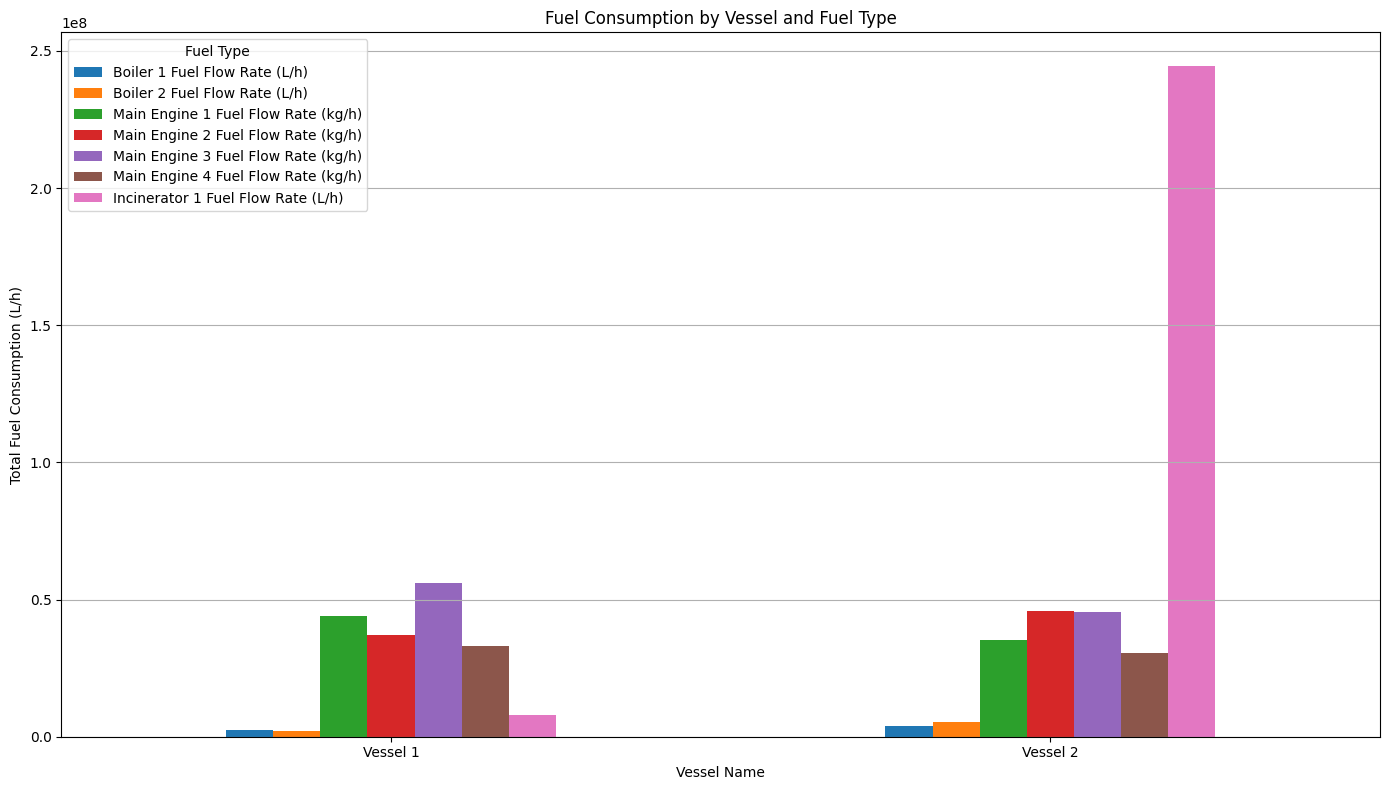

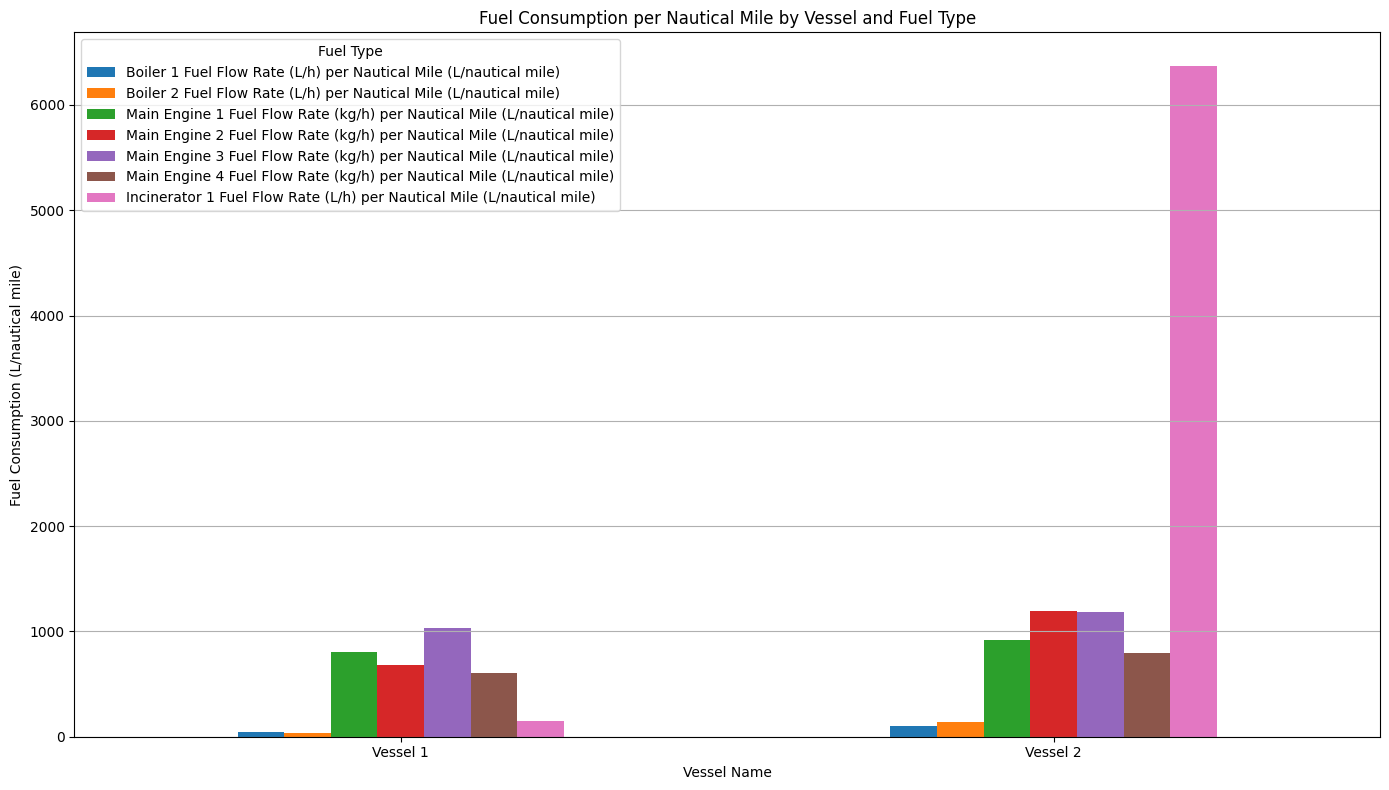

In [35]:
import matplotlib.pyplot as plt

# Plotting fuel efficiency by vessel and fuel type
fuel_efficiency_summary.set_index('Vessel Name')[fuel_columns].plot(kind='bar', figsize=(14, 8))

plt.title('Fuel Consumption by Vessel and Fuel Type')
plt.xlabel('Vessel Name')
plt.ylabel('Total Fuel Consumption (L/h)')
plt.xticks(rotation=0)
plt.legend(title='Fuel Type')
plt.grid(axis='y')
plt.tight_layout()
plt.show()

# Plotting fuel consumption per nautical mile
fuel_efficiency_summary.set_index('Vessel Name')[[f'{fuel_type} per Nautical Mile (L/nautical mile)' for fuel_type in fuel_columns]].plot(kind='bar', figsize=(14, 8))

plt.title('Fuel Consumption per Nautical Mile by Vessel and Fuel Type')
plt.xlabel('Vessel Name')
plt.ylabel('Fuel Consumption (L/nautical mile)')
plt.xticks(rotation=0)
plt.legend(title='Fuel Type')
plt.grid(axis='y')
plt.tight_layout()
plt.show()

# **In Fuel Efficiency KPI's we have calculated**

1) Average total fuel flow by vessel including incinerator:
Vessel 1 exhibits higher average total fuel flow compared to Vessel 2, indicating a greater overall energy demand.

2)Fuel Consumption by Vessel and Fuel Type:
Vessel 2 shows a remarkably high total fuel consumption, primarily driven by the Incinerator 1 Fuel Flow Rate (L/h), which is indicated by the large purple bar. This suggests that Vessel 2 is utilizing significant resources for waste incineration, possibly indicating a high volume of waste being generated or less efficient waste management practices.



# **Average Power Consumption Against Sea Temperature**

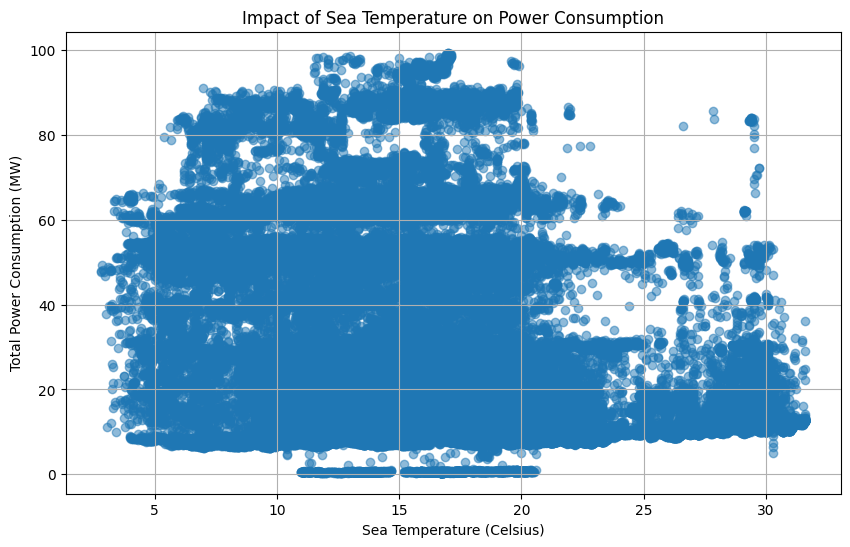

In [20]:
# Compare average power consumption against sea temperature
sea_temp_power_correlation = data.groupby('Sea Temperature (Celsius)')['Total Power (MW)'].mean()

# Plot the correlation
plt.figure(figsize=(10, 6))
plt.scatter(data_2['Sea Temperature (Celsius)'], data['Total Power (MW)'], alpha=0.5)
plt.title('Impact of Sea Temperature on Power Consumption')
plt.xlabel('Sea Temperature (Celsius)')
plt.ylabel('Total Power Consumption (MW)')
plt.grid()
plt.show()

# **Average power consumption against sea temperature**

The plot shows a wide range of total power consumption values across various sea temperatures. Most data points are clustered around lower power consumption levels (0 to 70 MW), with some outliers indicating higher power consumption.

# **average power consumption against true wind speed**

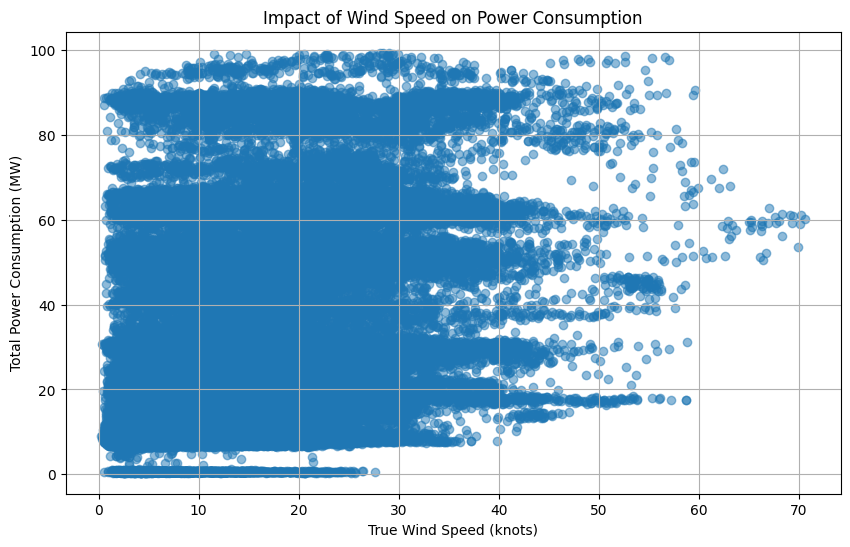

In [36]:
# Compare average power consumption against true wind speed
wind_speed_power_correlation = data.groupby('True Wind Speed (knots)')['Total Power (MW)'].mean()

# Plot the correlation
plt.figure(figsize=(10, 6))
plt.scatter(data['True Wind Speed (knots)'], data['Total Power (MW)'], alpha=0.5)
plt.title('Impact of Wind Speed on Power Consumption')
plt.xlabel('True Wind Speed (knots)')
plt.ylabel('Total Power Consumption (MW)')
plt.grid()
plt.show()

# **Average power consumption against true wind speed**

The scatter plot illustrates a broad range of total power consumption values across varying true wind speeds (0 to 70 knots). The data points are densely clustered, indicating that most of the power consumption values fall within a specific range.
A significant concentration of points is seen at lower power consumption levels (around 0 to 20 MW), with fewer occurrences at higher power levels, indicating that low power consumption is more common in the dataset.

# **Additional Metrics**

In [37]:
# Calculate Effective Wind Speed
data['Effective Wind Speed (knots)'] = data['True Wind Speed (knots)'] - data['Speed Over Ground (knots)']

# Calculate COG (assuming Latitude and Longitude are in degrees)
def calculate_cog(row):
    if row['Latitude (Degrees)'] != 0 and row['Longitude (Degrees)'] != 0:
        return np.arctan2(row['Longitude (Degrees)'], row['Latitude (Degrees)']) * (180 / np.pi)
    else:
        return np.nan

data['COG (Degrees)'] = data.apply(calculate_cog, axis=1)

# Calculate Drift Angle (assuming True Wind Direction is in degrees)
data['Drift Angle (Degrees)'] = data['True Wind Direction (Degrees)'] - data['COG (Degrees)']

# Calculate Safe Depth
#data['Safe Depth (m)'] = data['Depth (m)'] - data['Draft (m)']
# Example: Dropping rows with NaN in Depth or Draft
data_cleaned = data.dropna(subset=['Depth (m)', 'Draft (m)'])

# Recalculate Safe Depth after cleaning
data_cleaned['Safe Depth (m)'] = data_cleaned['Depth (m)'] - data_cleaned['Draft (m)']

# Summary of calculated metrics
summary_metrics = data[['Effective Wind Speed (knots)', 'COG (Degrees)', 'Drift Angle (Degrees)']]

# Display the summary metrics
print(summary_metrics.head())
print(data_cleaned[['Depth (m)', 'Draft (m)', 'Safe Depth (m)']].head())

                     Effective Wind Speed (knots)  COG (Degrees)  \
Start Time                                                         
2023-01-01 06:35:00                       -1.6530     -74.159272   
2023-01-01 06:40:00                        1.0564     -74.137878   
2023-01-01 06:45:00                       -1.5895     -74.117530   
2023-01-01 06:50:00                        6.7370     -74.102323   
2023-01-01 06:55:00                        8.0317     -74.093812   

                     Drift Angle (Degrees)  
Start Time                                  
2023-01-01 06:35:00             147.222272  
2023-01-01 06:40:00             143.771278  
2023-01-01 06:45:00             146.622130  
2023-01-01 06:50:00             150.177623  
2023-01-01 06:55:00             141.965712  
                     Depth (m)  Draft (m)  Safe Depth (m)
Start Time                                               
2023-01-01 06:35:00   46.86733     7.8516        39.01573
2023-01-01 06:40:00   32.76700    

1. **Effective Wind Speed (knots)**
The effective wind speed values fluctuate between negative and positive, indicating varying wind conditions:
Negative Values: For example, at 06:35 and 06:45, the effective wind speed is negative (-1.6530 and -1.5895 knots). This indicates that the wind is acting against the vessel's motion, potentially leading to higher fuel consumption as the engines work harder to maintain speed.
Positive Values: At 06:40, 06:50, and 06:55, the effective wind speed becomes positive, suggesting that the wind is aiding the vessel's forward motion, which can reduce fuel consumption.

2. **Course Over Ground (COG)**
The COG values are relatively stable and negative, hovering around -74.1 degrees. This indicates the vessel is moving in a generally consistent direction.
A stable COG suggests that the vessel is maintaining its intended course despite varying wind conditions.

3. **Drift Angle (Degrees)**
The drift angle values range from 141.97 degrees to 150.18 degrees over the time period analyzed:
These positive drift angles indicate that external forces (likely wind or current) are pushing the vessel off its intended course, necessitating course corrections to maintain navigation accuracy.
The drift angle values are relatively consistent, indicating a steady impact from wind or current throughout this timeframe.


4. **Depth (m)**
The recorded depth values range from 17.05 m to 46.87 m:
Higher depth readings suggest that the vessel is operating in sufficiently deep water, which is important for safe navigation and avoiding grounding.


5. **Draft (m)**
The draft values are consistent, around 7.85 m, which indicates the depth of water that the vessel displaces.
This measurement is crucial for determining the vessel's safety in relation to the available depth (i.e., Safe Depth).


6. **Safe Depth (m)**
The safe depth is calculated by subtracting the draft from the depth, and values range from 9.21 m to 39.02 m:
Positive safe depth values across all timestamps indicate ample clearance above the seabed, which is critical for safe navigation. However, the decreasing trend towards the end of the analyzed period (i.e., 9.21 m at 06:55) may signal approaching shallow areas, requiring increased caution.



# **END**
```
# This is formatted as code
```

